In [2]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install pickle-mixin

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import pickle

In [4]:
url= 'https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv'
df_raw = pd.read_csv(url)

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
df_raw.sample(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
6745,3.6827,34.0,5.197509,1.140569,1541.0,2.741993,34.12,-118.08,2.641
17208,2.6014,36.0,3.802632,1.016447,521.0,1.713816,34.43,-119.72,3.206
2200,6.7181,15.0,7.199438,0.941011,1080.0,3.033708,36.83,-119.85,1.603
15821,3.3816,52.0,4.486989,1.122677,1008.0,3.747212,37.75,-122.42,2.625
19191,3.9766,47.0,6.277778,1.069444,310.0,2.152778,38.45,-122.70,1.906
9929,2.3787,21.0,4.565341,1.011364,834.0,2.369318,38.29,-122.32,1.779
7209,2.1979,41.0,3.975379,1.003788,2325.0,4.403409,34.03,-118.17,1.408
10982,4.9957,22.0,5.718222,1.043556,2703.0,2.402667,33.75,-117.83,2.964
17404,1.6875,29.0,3.815041,1.048780,1634.0,3.321138,34.94,-120.44,1.227
8173,4.3897,36.0,6.022951,1.045902,810.0,2.655738,33.80,-118.11,2.350


In [7]:
df_raw.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [8]:
X_raw=df_raw[['Latitude','Longitude','MedInc']]

In [9]:
sc = StandardScaler()
X = sc.fit_transform(X_raw)

In [10]:
X[:10]

array([[ 1.05254828, -1.32783522,  2.34476576],
       [ 1.04318455, -1.32284391,  2.33223796],
       [ 1.03850269, -1.33282653,  1.7826994 ],
       [ 1.03850269, -1.33781784,  0.93296751],
       [ 1.03850269, -1.33781784, -0.012881  ],
       [ 1.03850269, -1.33781784,  0.08744664],
       [ 1.03382082, -1.33781784, -0.11136631],
       [ 1.03382082, -1.33781784, -0.39513665],
       [ 1.03382082, -1.34280914, -0.94235915],
       [ 1.03382082, -1.33781784, -0.09446958]])

In [11]:
clf=KMeans(n_clusters=6,random_state=408) # Define model
cluster=clf.fit(X)# fit model

In [12]:
df_clust=pd.DataFrame(np.append(X,cluster.labels_.reshape(-1,1),axis=1),columns=['Latitude','Longitude','MedInc','Clusters'])

In [13]:
df_clust['Clusters']=df_clust['Clusters'].astype('category')

In [14]:
centroide=pd.DataFrame(np.append(cluster.cluster_centers_,[[0],[1],[2],[3],[4],[5]],axis=1),columns=['Latitude','Longitude','MedInc','Clusters'])

In [15]:
print('Cluster of the first 10 observations')
df_clust.head(10)

Cluster of the first 10 observations


,Latitude,Longitude,MedInc,Clusters
0,1.052548,-1.327835,2.344766,0.0
1,1.043185,-1.322844,2.332238,0.0
2,1.038503,-1.332827,1.782699,0.0
3,1.038503,-1.337818,0.932968,0.0
4,1.038503,-1.337818,-0.012881,5.0
5,1.038503,-1.337818,0.087447,5.0
6,1.033821,-1.337818,-0.111366,5.0
7,1.033821,-1.337818,-0.395137,5.0
8,1.033821,-1.342809,-0.942359,5.0
9,1.033821,-1.337818,-0.094470,5.0


In [16]:
print("Centroide's coordenades of each cluster")
centroide.head(6)

Centroide's coordenades of each cluster


,Latitude,Longitude,MedInc,Clusters
0,0.972093,-1.189737,0.859328,0.0
1,-0.827887,0.770239,0.784964,1.0
2,0.229494,-0.079927,-0.657167,2.0
3,-0.849448,0.871934,-0.555650,3.0
4,-0.337342,0.161978,3.524350,4.0
5,1.271829,-1.161914,-0.551193,5.0


In [17]:
df_clust.columns

Index(['Latitude', 'Longitude', 'MedInc', 'Clusters'], dtype='object')

<Figure size 1000x1500 with 0 Axes>

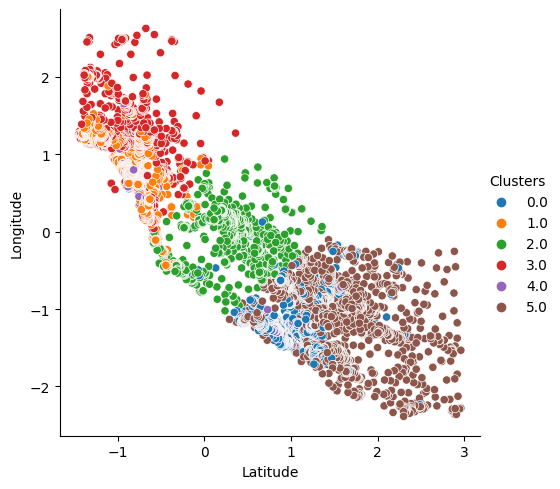

In [18]:
plt.figure(figsize=(10,15))
sns.relplot(data=df_clust,x="Latitude",y="Longitude",hue="Clusters")
plt.show()

<Figure size 1000x1500 with 0 Axes>

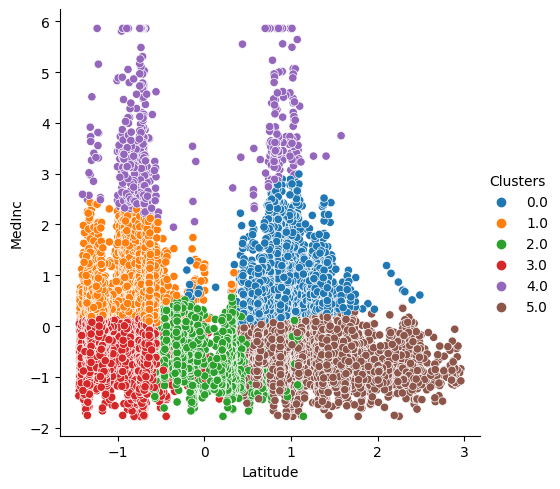

In [19]:
plt.figure(figsize=(10,15))
sns.relplot(data=df_clust,x="Latitude",y="MedInc",hue="Clusters")
plt.show()

<Figure size 1000x1500 with 0 Axes>

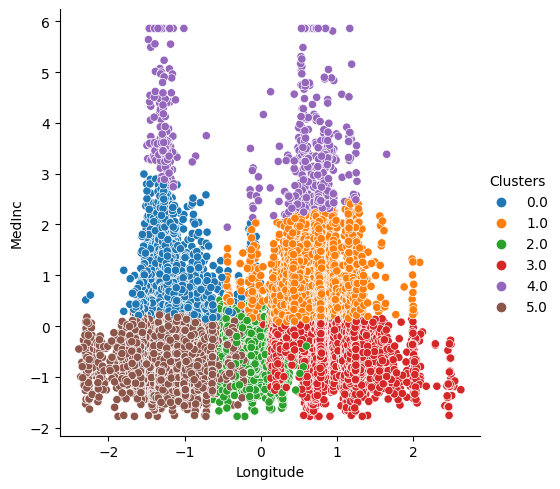

In [20]:
plt.figure(figsize=(10,15))
sns.relplot(data=df_clust,x="Longitude",y="MedInc",hue="Clusters")
plt.show()

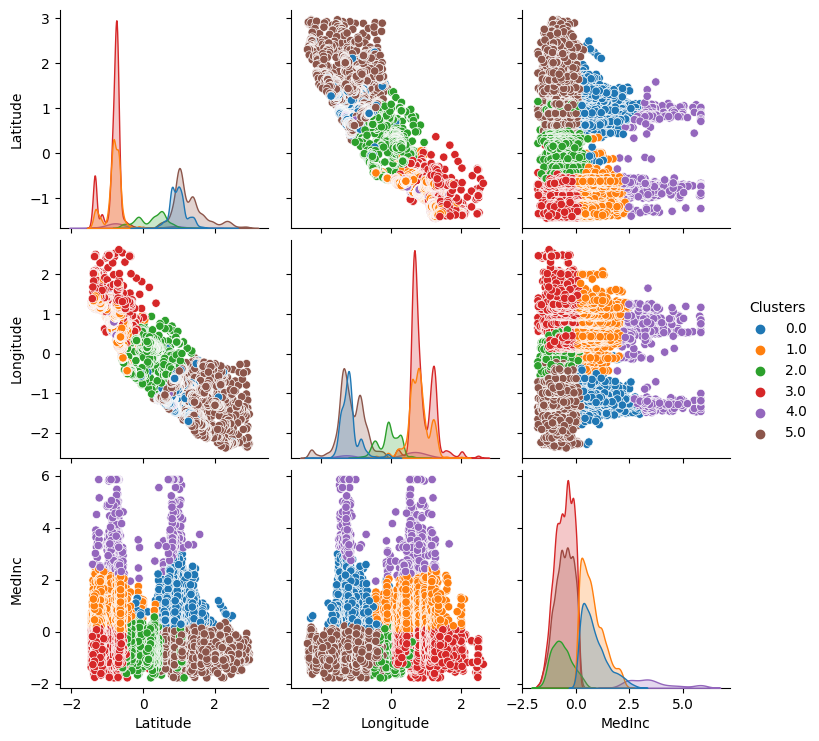

In [21]:
sns.pairplot(data=df_clust,hue='Clusters')
plt.show()

Text(0.5, 1.0, 'Regla del codo')

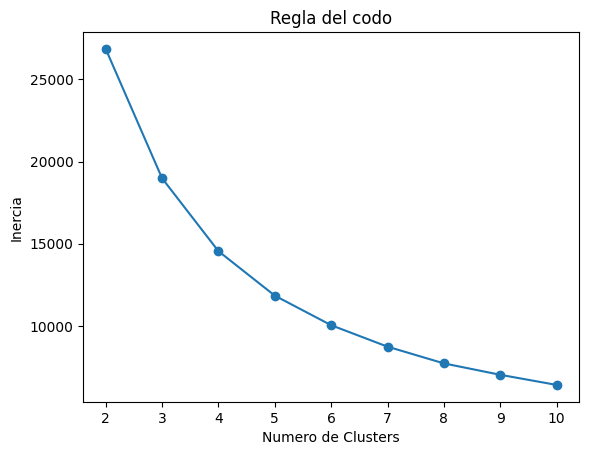

In [22]:
dist = []
clusters_centers = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, init = 'k-means++', n_init = 10, max_iter = 300,random_state = 408)
    _ = km.fit(X) 
    dist.append(km.inertia_)
    clusters_centers.append(km.cluster_centers_)
    
plt.plot(range(2, 11), dist, 'o-');
plt.ylabel('Inercia');
plt.xlabel('Numero de Clusters');
plt.title("Regla del codo")

In [ ]:
# Save the model as a pickle
filename = '/workspace/K-Means/models/final_model.pkl'
pickle.dump(clf, open(filename,'wb'))